<img style="padding-right: 10px;" src='https://i.ibb.co/vmVvrPF/ta-logo1.png' width="45" height="45" align="left"><BR CLEAR=ALL /><br>
<font size=7 align='center' face='fantasy'>Scraping Restaurant Data from <font color=#33E0A1>TripAdvisor</font><br></br>
    for <font color=#728FCE> ANY CITY</font> Using Python</font><BR CLEAR=ALL /><br>
<font color=grey size=5 align='left' face='sans'>Using BeautifulSoup, Requests, Seaborn, and Pandas</font><br>
<img src='https://i.ibb.co/vz53r88/restt.jpg' width="1000" height="1000" align="left" style="border:10px grey;">


<font size=5 align='left'><img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
          <b>Web Scraping using Python</b>
</font><br>
<font size=3 align='left'><br>
Using web scraping, we can extract data like product prices, ratings and other types of information from websites. We can then use this data for various purposes like data analysis, research, business intelligence, and data science. In Python, web scraping is often done using libraries like Beautiful Soup, Scrapy, and Requests, which make it easier to retrieve and parse data from web pages.
</br></font>

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
          <b>But wait, this is not just another scraping project!</b>
  </p>
</font>
<font size=3 align='left'> 
<br>
This project aims to scrape restaurant details from any city in any country, along with a <font color=red>tadka</font> of Exploratory Data Analysis from the scraped data. If this doesn't make you the pundit of web scraping using Python, what will? ;)
</br></font>
<img src='https://s3.memeshappen.com/memes/wow--meme-10622.jpg' width="200" height="200" align="center">

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left"> 
     <b>How would the scraped csv look like?</b></p>
</font>
<font size=3 align='left'> 
<br>  
The scraped restaurant data would contain:
<ul>
    <b><li><font color=#F36530>Name of the Restaurant</font></li>
        <li><font color=#F36530>Total Reviews</font></li>
        <li><font color=#F36530>Star/Bubble Rating</font></li>
        <li><font color=#F36530>Cuisines</font></li></b>
</ul>
Other useful information that can be used for debugging includes page number, restaurant serial number, and data offset.

</br>
<img src="https://i.ibb.co/tM6t1NS/csv-screenshot.png" width="750" height ="750">

The above sample is of Berlin, Germany.
</font>

<img src='https://i.ibb.co/wKTTTFh/153783366-lets-start-inscription-handwritten-lettering-illustration-black-vector-text-in-speech-bubb.png' width="300" height="300" align="center">

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left"> 
     <b>Control Variable/Input Parameters</b></p>
</font>

<font size=3 align='left'> 
<br>  
    <p>
In this project, we have selected Berlin, Germany. For example, if we wish to scrape all restaurants in Bangalore, Karnataka, we will filter the same on Tripadvisor, and we will get a link that would look something like this:<br></br>
<font color='deep pink'>"https://www.tripadvisor.in/Restaurants-g297628-Bengaluru_Bangalore_District_Karnataka.html".</font><br></br>
        In this link, "297628" is the geo-code, and "Bengaluru_Bangalore_District_Karnataka" is the city name. If we notice, on Tripadvisor, it shows around 11,127 restaurants for Bengaluru. So now, our input parameters would be:
<ul>
    <b><li><font color=#F36530>Geo Code</font></li>
        <li><font color=#F36530>City Name</font></li>
        <li><font color=#F36530>Upper Data Offset</font></li>
</ul>
    </p>
</font>
</br>

<font size=3 align='left'>
Now that we have selected a city along with its geo-code of our choice, let's proceed with the script. <br></br> The first step is to import the required libraries. (Install if needed.)
The next step is to define the control variables. Since we will be scraping restaurant data from Berlin, Germany, we will define the variables accordingly. Also, there are a total of 30 restaurants listed per page on TripAdvisor, which constitutes our page size. The last page has the data  offset of 6330, which would be our data offset upper limit. <br></br>
These control variables will change according to the city we are trying to scrape.

In [3]:
pip install "requests_html"

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 50 kB 8.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 83 kB 2.7 MB/s             
     |████████████████████████████████| 106 kB 68.5 MB/s            
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=6cc94f109ce17e00339cb82d42ac2b229bb486ea3ca8665bb0ff20d725546da1
  Stored in directory: /home/jovyan/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=10f887286e614a55d95cd21d219a746ee01a47be27934c5185327bdd665badc2
  Stored in directory: /home/jovyan/.cache/pip/wheels/d6/9c/58/ee3ba36897e890f3ad81e9b730791a153fce20caa4a8a474df
Successfully built bs4 parse
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install "bs4"

Note: you may need to restart the kernel to use updated packages.


In [5]:
# pip install "requests.html"

# Import Libraries
import requests
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import pandas as pd
import functools
import time

# store the url in a variable
scraping_control_variables = {
    'city_name' : 'Berlin',
    'geo_code' : '187323',
    'data_offset_lower_limit' : 0,
    'data_offset_upper_limit' : 6330,
    'page_num' : 0,
    'page_size' : 30
}


<font size=3 align='left'> There are a total of 10 functions that will be used in this script.
<ul>
    <li><font size = 3 color=teal>get_url</font></li>
    <li><font size = 3 color=teal>get_soup_content</font></li>
    <li><font size = 3 color=teal>get_card</font></li>
    <li><font size = 3 color=teal>parse_tripadvisor</font></li>
    <li><font size = 3 color=teal>get_restaurant_data_from_card</font></li>
    <li><font size = 3 color=teal>scrape_star_ratings</font></li>
    <li><font size = 3 color=teal>scrape_reviews</font></li>
    <li><font size = 3 color=teal>scrape_cuisines</font></li>
    <li><font size = 3 color=teal>scrape_title</font></li>
    <li><font size = 3 color=teal>save_to_csv</font></li>
</ul>
    Let's go through each function one by one.
</font>
  

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left"> 
     <b>get_url</b></p>
</font><br>
<font size=3 align='left'> 
    <font color = teal>get_url</font> takes geo-code, data offset, and city name as inputs and creates a different url for every page to be scraped. The url follows a pattern as the data offset is a multiple of 30. For Example,<br>
    <p STYLE="text-transform:lowercase">
        <a href="url">https://www.tripadvisor.in/Restaurants-g187323-oa90-Berlin.html#EATERY_LIST_CONTENTS<br></a>
        <a href="url">https://www.tripadvisor.in/Restaurants-g187323-oa120-Berlin.html#EATERY_LIST_CONTENTS<br></a>
        <a href="url">https://www.tripadvisor.in/Restaurants-g187323-oa150-Berlin.html#EATERY_LIST_CONTENTS</br></a>
    </p>
    
</font>
</br>

In [6]:
# Function to get URL for every page

def get_url(gc, do, city):
    data_offset_var = '-oa'+str(do)
    if do == 0:
        data_offset_var = ''
    url = f"https://www.tripadvisor.in/RestaurantSearch-g{gc}{data_offset_var}-a_date.2023__2D__03__2D__05-a_people.2-a_time.20%3A00%3A00-a_zur.2023__5F__03__5F__05-{city}.html#EATERY_LIST_CONTENTS"
    print("URL to be scraped: ","\n", url, "\n")
    return url

<font size=5 align='left'>
  <p>
      <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left"> 
     <b>get_soup_content</b></p>
</font><br>
<font size=3 align='left'> 
<font color = teal>get_soup_content</font> takes geo-code, data-offset and city name as an input to call get_url function. Also, it creates a response object using the url obtained. Once the HTML is accessible, we need to parse the HTML and load it into a BS4 structure. This soup object is very handy and allows us to access useful pieces of information such as title, cuisines, ratings etc.
</font>

In [7]:
# Function to get soup content

def get_soup_content(gc, do, city):
    time.sleep(5)
    url = get_url(gc, do, city)
    # start the HTML session
    print("HTML session started")  
    r = HTMLSession()
    response_obj = r.get(url,verify=False)
    soup_content = BeautifulSoup(response_obj.content, "html.parser")
    return soup_content

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>get_card</b>
  </p>
</font>
<br>
<font size=3 align='left'> 
The <font color = teal>get_card </font> function will help in getting the individual restaurant cards according to the restaurant serial number or restaurant count. The card tags follow this pattern: 1_list_item, 2_list_item, 3_list_item, etc.<br>
*Screenshot for reference*
</font>
<img src="https://i.ibb.co/cg2BN3w/ccardd.png" width = "1000" height = "600"  >

In [8]:
def get_card(rest_cnt, soup_content):
    card_tag = f"{rest_cnt}_list_item"
    print(f"Scraping item number: {card_tag}")
    card = soup_content.find("div",{"data-test":card_tag})
    return card

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>parse_tripadvisor</b>
  </p>
</font>
<br>
<font size=3 align='left'> 
    <font color = teal> The parse_tripadvisor</font> function takes control variables defined in earlier steps as an input. This is one of the most important functions in the script. Variables data_offset_lower_limit, data_offset_upper_limit, page_num, page_size, geo_code, and city_name take their values from the scraping_control_variables dictionary. The value of data_offset_current is set to the value of data_offset_lower_limit, which is incremented by 30 for each page in the following loop.<br>
The while loop runs until the last page to be scraped (around 212 pages). page_start_offset and page_end_offset will take values like (0, 31), (31, 61), (61, 91), etc. As each page generally contains 30 restaurants. But since we can't be completely sure if the page would contain fewer than 30 restaurants, we have also included the if condition inside the loop, which takes care of that.<br> The function <font color = teal>get_restaurant_data_from_card</font> is used to scrape restaurant details and append them to an empty list, restaurants_scraped.
</font></br>

In [9]:
def parse_tripadvisor(scraping_control_variables):
    restaurants_scraped = []
    data_offset_lower_limit = scraping_control_variables['data_offset_lower_limit']
    data_offset_upper_limit = scraping_control_variables['data_offset_upper_limit']
    page_num = scraping_control_variables['page_num']
    page_size = scraping_control_variables['page_size']
    geo_code = scraping_control_variables['geo_code']
    city_name = scraping_control_variables['city_name']

    data_offset_current = data_offset_lower_limit
    
    while data_offset_current <= data_offset_upper_limit :
        print("Scraping Page Number: ", page_num)
        print("Scraping Data Offset: ", data_offset_current)
        page_start_offset = (page_num*page_size) + 1
        page_end_offset = (page_num*page_size) + page_size + 1
        soup_content = get_soup_content(geo_code, data_offset_current , city_name)
        for rest_cnt in range(page_start_offset , page_end_offset):
            card = get_card(rest_cnt, soup_content)
            if card is None:
                break
            restaurant_data = get_restaurant_data_from_card(rest_cnt, data_offset_current, page_num, card)
            restaurants_scraped.append(restaurant_data)
        print("Scraping Completed for Page Number: ", page_num, "\n" )
        print("Data Offset: ", data_offset_current)
        page_num = page_num + 1
        data_offset_current = data_offset_current + 30
    return restaurants_scraped

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>get_restaurant_data_from_card</b>
  </p>
</font>
<br>
<font size=3 align='left'>
<font color = teal>parse_tripadvisor</font> function takes the restaurant count, current data offset, page number, and card number as input and calls individual scrape functions created to get restaurant details. 
</font>

In [10]:
def get_restaurant_data_from_card(rest_cnt, data_offset_current, page_num, card):
    restaurant_data = {
        'title': scrape_title(card),
        'cuisines': scrape_cuisines(card) ,
        'reviews': scrape_reviews(card),
        'star rating': scrape_star_ratings(card),
        'page number': page_num,
        'data offset': data_offset_current,
        'restaurant serial number': rest_cnt
    }
    
    return restaurant_data

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>Scraping Functions to get Restaurant Details</b>
  </p>
</font>
<br>
<font size=3 align='left'>
All the below functions take the card as input which contain all information pertaining to a particular restauarant.<br>
<font color = teal>scrape_star_ratings</font> - gets the star/customer rating of the restaurant.<br>
<font color = teal>scrape_reviews</font> - gets the total reviews of the restaurant.<br>
<font color = teal>scrape_cuisines</font> - gets all the cuisines offered by the restaurant.<br>
<font color = teal>scrape_title</font> - gets the name of the restaurant.<br>
</font>
<font size=3 align='left'><b>
    <ul>
    <li>Title:</li>
        <img src="https://i.ibb.co/B2PQYc3/title-tag.png" width = "400" height = "300" align = "left" ><BR CLEAR=ALL /><br>
    <li>Ratings</li>
        <img src="https://i.ibb.co/RQwTJcC/rating-tag.png" width = "1000" height = "300" align = "left"><BR CLEAR=ALL /><br>
    <li>Reviews</li>
        <img src="https://i.ibb.co/Tct2tpG/reviews-tag.png" width = "400" height = "300" align = "left"><BR CLEAR=ALL /><br>
    <li>Cuisines</li>
        <img src="https://i.ibb.co/CQj13vq/cuisines-tag.png" width = "400" height = "300" align = "left">
    </ul>
 </font>


In [11]:
def scrape_star_ratings(card):
    star_rating = card.find_all('svg',class_ = "UctUV d H0")
    scraped_star_ratings = star_rating[0]['aria-label'] if len(star_rating) >= 1 else None
    return scraped_star_ratings


def scrape_reviews(card):
    reviews = card.find_all('span', class_ = "IiChw")
    scraped_reviews = reviews[-1].text if len(reviews) >= 1 else None
    return scraped_reviews


def scrape_cuisines(card):
    cu_1 = card.find('div', class_ = 'hBcUX XFrjQ mIBqD')
    try:
        scraped_cuisines = cu_1.find('span', class_ = 'SUszq').get_text()
    except AttributeError:
        scraped_cuisines = None
    return scraped_cuisines


def scrape_title(card):
    title = card.find_all('div', class_ = 'RfBGI')
    scraped_title = None if len(title) < 1 else title[0].text
    return scraped_title

<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>Saving the scraped file as a CSV</b>
  </p>
</font>
<br>
<font size=3 align='left'>
Finally, let's save the dataframe as a csv in our local repository, and we are done! This csv can be used for any data analysis and data science projects.
</font>

In [13]:
def save_to_csv(restaurants_scraped):
    # finally, store the output into a csv file
    print("storing the data in csv")
    output_df = pd.DataFrame(restaurants_scraped)
    output_df.drop_duplicates(inplace=True)
    output_df.to_csv("ta_berlin_restaurants_scraped.csv", index= False)
    print("csv stored")

In [14]:
def scrape_and_save(scraping_control_variables):
    restaurants_scraped = parse_tripadvisor(scraping_control_variables)
    save_to_csv(restaurants_scraped)
    return restaurants_scraped

In [15]:
# disable secure certificate warnings
requests.packages.urllib3.disable_warnings()
restaurants_scraped = scrape_and_save(scraping_control_variables)

# Print Dataframe
scraped_df = pd.DataFrame(restaurants_scraped)
print("Reastaurant Data Scraped:\n",scraped_df.head(20) )

Scraping Page Number:  0
Scraping Data Offset:  0
URL to be scraped:  
 https://www.tripadvisor.in/RestaurantSearch-g187323-a_date.2023__2D__03__2D__05-a_people.2-a_time.20%3A00%3A00-a_zur.2023__5F__03__5F__05-Berlin.html#EATERY_LIST_CONTENTS 

HTML session started
Scraping item number: 1_list_item
Scraping item number: 2_list_item
Scraping item number: 3_list_item
Scraping item number: 4_list_item
Scraping item number: 5_list_item
Scraping item number: 6_list_item
Scraping item number: 7_list_item
Scraping item number: 8_list_item
Scraping item number: 9_list_item
Scraping item number: 10_list_item
Scraping item number: 11_list_item
Scraping item number: 12_list_item
Scraping item number: 13_list_item
Scraping item number: 14_list_item
Scraping item number: 15_list_item
Scraping item number: 16_list_item
Scraping item number: 17_list_item
Scraping item number: 18_list_item
Scraping item number: 19_list_item
Scraping item number: 20_list_item
Scraping item number: 21_list_item
Scraping

In [16]:
print("Total Restaurants scraped:\t", len(scraped_df))

Total Restaurants scraped:	 6356


<font size=5 align='left'>
  <p>
    <img style="padding-right: 10px;padding-top: 0px;" src='https://i.ibb.co/878wW18/resttt-fotor-bg-remover-20230315225922.png' width="40" height="40" align="left">
    <b>We are not done yet!</b>
  </p>
</font>
<br>
<img src="https://i.ibb.co/6Zqt2wH/picture-abhi.jpg" width = "250" height = "250"><br>
<font size=3 align='left'>
Let's do some Exploratory Data Analysis on the scraped data. We will try to plot the following analysis using Seaborn.<br>
<ul>
<b>
<li><font color=#9E5EE7>Top 10 most popular cuisines in Berlin, Germany</font></li>
<li><font color=#9E5EE7>Number of reviews vs. star rating of a restaurant in Berlin, Germany</font></li>
</b>
</ul><br>
    The <font color = teal>clean_dataframe</font> function does the job of cleaning the scraped output dataframe, such as splitting the serial number from the restaurant name, dropping unnecessary columns, splitting cuisines (as they are concatenated in the same row with a comma), and removing noise from some columns.<br>
    <font color = teal>clean_dataframe</font> function creates a bar plot of popular cuisines in Berlin using Seaborn.<br>
    <font color = teal>scatter_plot_viz</font> function shows the best places to eat in Berlin by visualizing the relationship between rating and number of reviews. As depicted in the plot, we would prefer the restaurants with high ratings and a high number of reviews.<br>
</font>



   total_restaurants_offering_cuisines       cuisines
0                                  932        Italian
1                                  879         German
2                                  719       European
3                                  649          Asian
4                                  437  Mediterranean
5                                  419           Cafe
6                                  362          Pizza
7                                  346            Bar
8                                  287     Vietnamese
9                                  266      Fast food


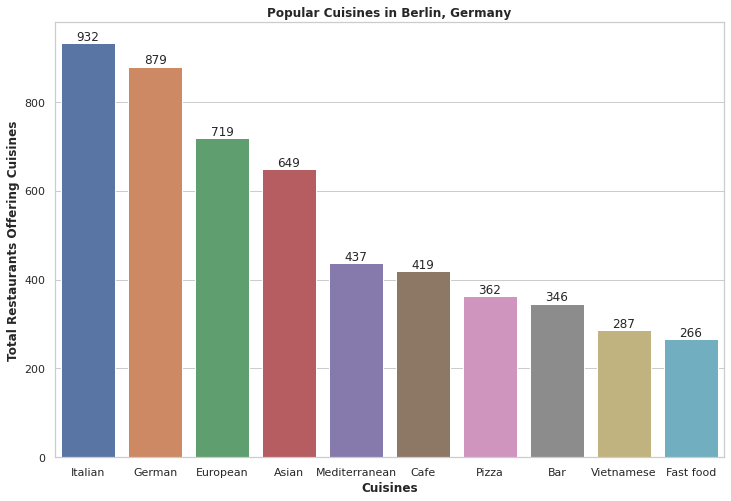

             restaurant_name  reviews  star rating
0  Clubrestaurant am Wannsee    239.0          5.0
1       Cafe Couscous - Vege    132.0          5.0
2                    happies    391.0          5.0
3                     Haveli   1417.0          4.5
4                 Hackethals   1514.0          4.5
5                Ataya Caffe    221.0          5.0
6          Ristorante A MANO   2630.0          4.5
7                Burger Turm    877.0          5.0
8     Restaurant Buschbeck's    348.0          5.0
9                Naveenapath    736.0          5.0


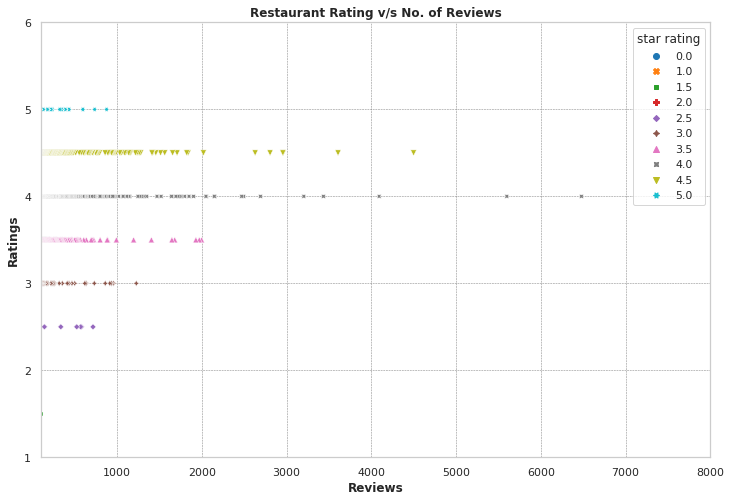

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [12, 8]

# Take the input as the scraped output
ta_restaurants = scraped_df

def clean_dataframe(df):
    # clean title, split sr_no and name
    df[['sr_no','restaurant_name']] = df["title"].str.split(" ", 1, expand=True)
    df["restaurant_name"] = df["restaurant_name"].str.strip(" ")

    # drop unnecessary columns
    df = df.drop('sr_no', axis=1)
    df = df.drop('page number', axis=1)
    df = df.drop('data offset', axis=1)

    # split cuisines
    df[['cuisine_1','cuisine_2']] = df["cuisines"].str.split(",", expand=True)
    df = df.melt(id_vars=["title", "cuisines", "reviews", "star rating", "restaurant serial number", "restaurant_name"], 
        var_name="cuisines_melt",
        value_name="cuisines_all"
        )
    # clean columns
    df["reviews"] = df["reviews"].str.replace('reviews', '').str.replace('review', '').str.replace(',', '').str.strip(" ")
    df["star rating"] = df["star rating"].str.replace(' of 5 bubbles', '').str.strip(" ")
    df["cuisines_all"] = df["cuisines_all"].str.replace('₹', '').str.replace('₹₹ - ₹₹₹', '').str.replace('-', '').str.strip(" ")
    return df

def popular_cuisines(df):
    # df_popular_cuisines = df.where(df['cuisines_all'] != '').groupby(['cuisines_all'])['restaurant_name'].nunique().sort_values(ascending=False).head(20)
    df_popular_cuisines = df.where(df['cuisines_all'] != '').groupby("cuisines_all").agg(total_restaurants_offering_cuisines=('restaurant_name', 'nunique'))
    df_popular_cuisines = df_popular_cuisines.sort_values(by = ["total_restaurants_offering_cuisines"],ascending=False).head(10)
    df_popular_cuisines['cuisines'] = df_popular_cuisines.index
    df_popular_cuisines = df_popular_cuisines.reset_index(drop=True)
    print(df_popular_cuisines.head(10))
    ax_1 = sns.barplot(data=df_popular_cuisines, x="cuisines", y="total_restaurants_offering_cuisines")
    ax_1.set_title('Popular Cuisines in Berlin, Germany', size = 14, font = 'sans', fontweight='bold')
    ax_1.set_xlabel("Cuisines", size = 10, font = 'sans', fontweight='bold')
    ax_1.set_ylabel("Total Restaurants Offering Cuisines", size = 10, font = 'sans', fontweight='bold')
    for i in ax_1.containers:
        ax_1.bar_label(i,)
    plt.show()
    return df_popular_cuisines

def scatter_plot_viz(df):
    df_subset = df[["restaurant_name","reviews","star rating"]]
    df_subset = df_subset.drop_duplicates()
    df_subset['reviews'] = df_subset['reviews'].fillna(0).astype(int)
    df_subset['star rating'] = df_subset['star rating'].fillna(0).astype(float)
    df_subset = df_subset.where(df_subset['star rating'] != -1.0)
    print(df_subset.head(10))
    sns.set( style = "whitegrid" ) 
    ax = sns.scatterplot(x="reviews",
                        y="star rating",
                        data=df_subset.sort_values("reviews", ascending= False),
                        style="star rating",
                        hue ="star rating",
                        palette = 'tab10'
                        )
    ax.set_title('Restaurant Rating v/s No. of Reviews', size = 14, font = 'sans', fontweight='bold')
    ax.set_xlabel("Reviews", size = 10, font = 'sans', fontweight='bold')
    ax.set_ylabel("Ratings", size = 10, font = 'sans', fontweight='bold')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
#     ax.set(yticklabels=[0,1,2,3,4,5])
    ax.set(xscale="linear")
    ax.set(xlim = (100,8000))
    ax.set(ylim = (1,6))
    plt.show()

ta_restaurants_clean = clean_dataframe(ta_restaurants)
popular_cuisines_df = popular_cuisines(ta_restaurants_clean)
scatter_plot_viz(ta_restaurants_clean)

<img src="https://i.ibb.co/X4kK80j/thats-all.jpg" width = "400" height = "400" align = "center">

In [19]:
import jovian
jovian.commit(filename='scraping-restaurant-details-of-any-city-from-TripAdvisor-using-Python')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anshikanigam1493/scraping-restaurant-details-from-tripadvisor" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/anshikanigam1493/scraping-restaurant-details-from-tripadvisor


'https://jovian.com/anshikanigam1493/scraping-restaurant-details-from-tripadvisor'